In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install quandl

In [1]:
import quandl
import matplotlib.pyplot as plt
%matplotlib inline

quandl_authtoken = "...."   # <--- replace with your quandl token 

df_ym = quandl.get("CHRIS/CME_YM1", authtoken=quandl_authtoken, start_date="2010-1-1")  #dow jones
df_vix = quandl.get("CHRIS/CBOE_VX1", authtoken=quandl_authtoken, start_date="2007-1-1")
df_sp = quandl.get("CHRIS/CME_SP1", authtoken=quandl_authtoken, start_date="2010-1-1")

df_c = quandl.get("CHRIS/CME_C1", authtoken=quandl_authtoken, start_date="2010-1-1")    # corn
df_w = quandl.get("CHRIS/CME_W1", authtoken=quandl_authtoken, start_date="2010-1-1")    # wheat



In [9]:
# Augmented dicker-fuller test
df = df_ym  # dow jones
df = df_vix# vix


#print(df.tail())
print(df.head())

             Open   High    Low  Close  Settle  Change  Total Volume  EFP  \
Trade Date                                                                  
2007-01-03  123.0  123.0  123.0  123.0   123.0     0.0           0.0  0.0   
2007-01-04  122.7  124.5  120.6  121.5   121.1    -1.0         287.0  0.0   
2007-01-05  121.9  124.4  121.9  123.9   123.8     2.7         161.0  0.0   
2007-01-08  124.2  125.6  122.1  122.7   122.5    -1.3         443.0  0.0   
2007-01-09  122.8  125.0  121.0  123.7   123.4     0.9         408.0  0.0   

            Prev. Day Open Interest  
Trade Date                           
2007-01-03                   4618.0  
2007-01-04                   4533.0  
2007-01-05                   4431.0  
2007-01-08                   4691.0  
2007-01-09                   4100.0  


In [10]:

from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    adft = adfuller(timeseries, autolag='AIC')
    return adft[1]

#####################################################################################
# windows of trading days
periods = [ 125, 250, 750, 1250]    # 6 months, 1 year, 3 years, 5 years

adfs = []

for period in periods:
    # augmented dicker fuller test
    adft = adf_test(df.Settle[-period:])    # take last "period" samples
    adfs.append(adft) 

print(adfs)

[0.04861855978842489, 0.00047394013983813766, 0.026990775480773353, 0.000943996392451455]


In [193]:
# Hurst Exponent

In [11]:
from hurst import compute_Hc

hursts = []
for period in periods:
    # Evaluate Hurst equation
    if len(df.Settle[-period:]) < 100:
        H = c= 0
    else:
        H, c, data = compute_Hc(df.Settle[-period:], kind='price', simplified=True)

    hursts.append(H)

print(hursts)


[0.4420116516690187, 0.33866901051641013, 0.48763408474867265, 0.4627092901738934]


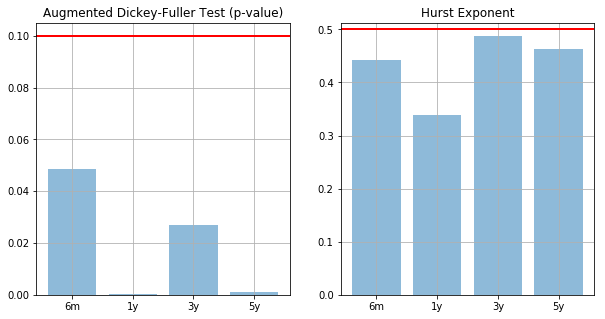

In [12]:
import numpy as np

objects = ( '6m', '1y', '3y', '5y')
y_pos = np.arange(len(objects))


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


ax1.bar(y_pos, adfs, align='center', alpha=0.5)
ax1.axhline(y=0.10,linewidth=2, color='r')

ax1.grid(True)

ax2.bar(y_pos, hursts, align='center', alpha=0.5)
ax2.axhline(y=0.50,linewidth=2, color='r')

ax2.grid(True)
# Set the ticks and ticklabels for all axes
plt.setp(ax1, xticks=range(len(objects)), xticklabels=objects)
plt.setp(ax2, xticks=range(len(objects)), xticklabels=objects)


ax1.set_title('Augmented Dickey-Fuller Test (p-value)')
ax2.set_title('Hurst Exponent')

plt.show()
